In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [168]:
data = pd.read_csv('ex2data2.csv')
data.head()

,x,y,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [169]:
# extract the features and output
raw_X = data.iloc[:,0:2].values
Y = data.iloc[:,2].values
np.shape(raw_X),np.shape(Y)

((118, 2), (118,))

**2.1 Visualizing the data**

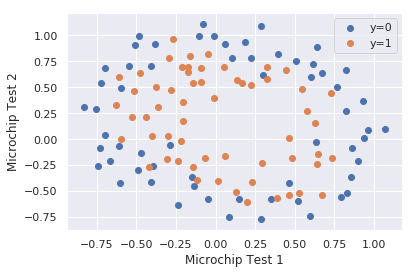

In [170]:
data0 = data[data['label']==0]
data1 = data[data['label']==1]
plt.scatter(data0['x'].values,data0['y'].values,label='y=0')
plt.scatter(data1['x'].values,data1['y'].values,label='y=1')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

**2.2 Feature Mapping**

In [171]:
df_copy = data.copy()
X1 = raw_X[:,0]
X2 = raw_X[:,1]
def feature_mapping(features,degree=6):
    degree = 6
    count = 0
    for i in range(1,degree+1):
        for j in range(0,i):
            x1_feature = np.power(features[0],i-j)
            x2_feature = np.power(features[1],j)
            features.append(x1_feature)
            features.append(x2_feature)
    X0 = np.vstack(features).T
    return X0
X0 = feature_mapping(features=[X1,X2])
np.shape(X0)

(118, 44)

In [172]:
# add a bias column with value one to capture the intercept
ones= np.ones(shape=(len(data),1))
X = np.concatenate((ones,X0),axis=1)
m,n = np.shape(X)

# initialize the learning parameters
theta = np.zeros(shape=(n,1))

In [173]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

**2.3 Cost function and Gradient Descent**

In [174]:
lamb = 1
def error(theta,X,Y,lamb):
    hypo = sigmoid(X@theta)
    return 1/m*(-Y.T@np.log(hypo) - (1-Y.T)@np.log(1-hypo)) + lamb/(2*m)*np.sum(np.square(theta))
def my_gradient(theta,X,Y,lamb):
    m,n = np.shape(X)
    theta = theta.reshape(n,1)
    Y = Y.reshape(-1,1)
    grad = (1/m)*X.T@(sigmoid(X@theta)-Y)
    grad[1:] = grad[1:] + lamb/m*theta[1:]
    return grad

In [175]:
np.shape(my_gradient(theta,X,Y,lamb)), np.shape(gradient(theta,X,Y,lamb))

((45, 1), (45, 118))

In [176]:
# learning
error(theta,X,Y,lamb)
np.shape(gradient(theta,X,Y,lamb))

(45, 118)

**2.4 Learning parameters**

In [177]:
from scipy.optimize import fmin_tnc
temp = fmin_tnc(func=error, x0 = theta.flatten(), fprime=my_gradient, args=(X,Y.flatten(),lamb))

In [178]:
theta_fit = temp[0]
np.shape(theta_fit)

(45,)

In [179]:
def convert_values(pi, threshold=0.5):
    for i,v in enumerate(pi):
        if v <= threshold:
            
            pi[i] = 0
        else:
            pi[i] = 1
    return np.array(pi)
pi = sigmoid(X@theta_fit)
convert_values(pi)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

**2.5 Plotting the decision boundary**

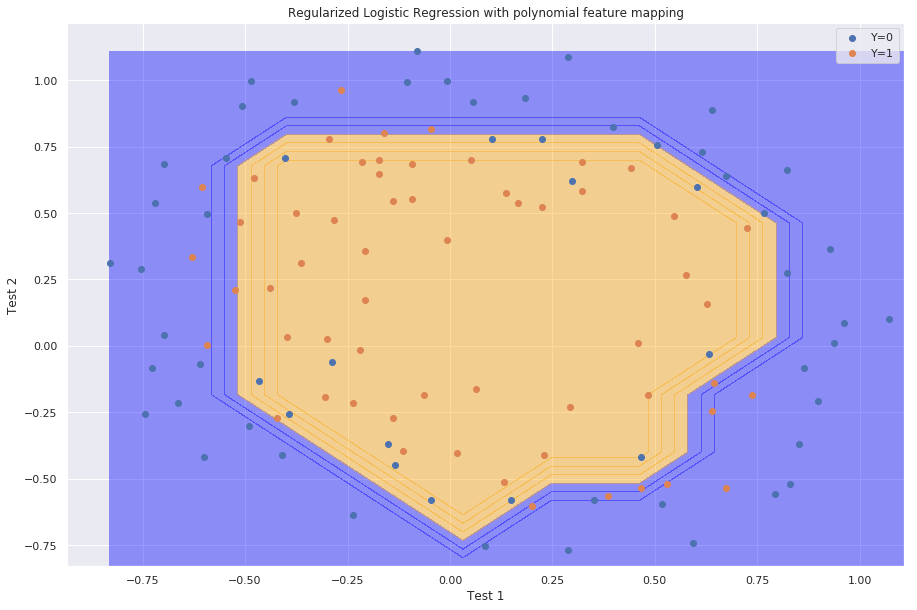

In [180]:
xs = np.linspace(min(data['x']),max(data['y']),num=10)
ys = np.linspace(min(data['x']),max(data['y']),num=10)

# transform x vector into 33 by 

X_grid,Y_grid = np.meshgrid(xs,ys)
Z_grid = np.zeros(shape=(len(ys),len(xs)))
for i in range(len(xs)):
    for j in range(len(ys)):
        # value = np.array([1,,])@theta_fit
        X_1, X_2 = [xs[i],ys[j]]
        X_variable = feature_mapping(features=[X_1,X_2])
        b = np.array([1]).reshape(1,1)
        X_f = np.concatenate((b,X_variable),axis=1)
        value = convert_values(sigmoid(X_f@theta_fit))
        Z_grid[j,i] = value
        
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
plt.contourf(X_grid,Y_grid,Z_grid,cmap=ListedColormap(('blue','orange')),alpha=0.4)
plt.scatter(data0['x'],data0['y'],label='Y=0')
plt.scatter(data1['x'],data1['y'],label='Y=1')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Regularized Logistic Regression with polynomial feature mapping')
plt.legend()

**2.6 Evaluation of the logistic regression model**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in matmul
  after removing the cwd from sys.path.


Text(0,0.5,'Accuracy in %')

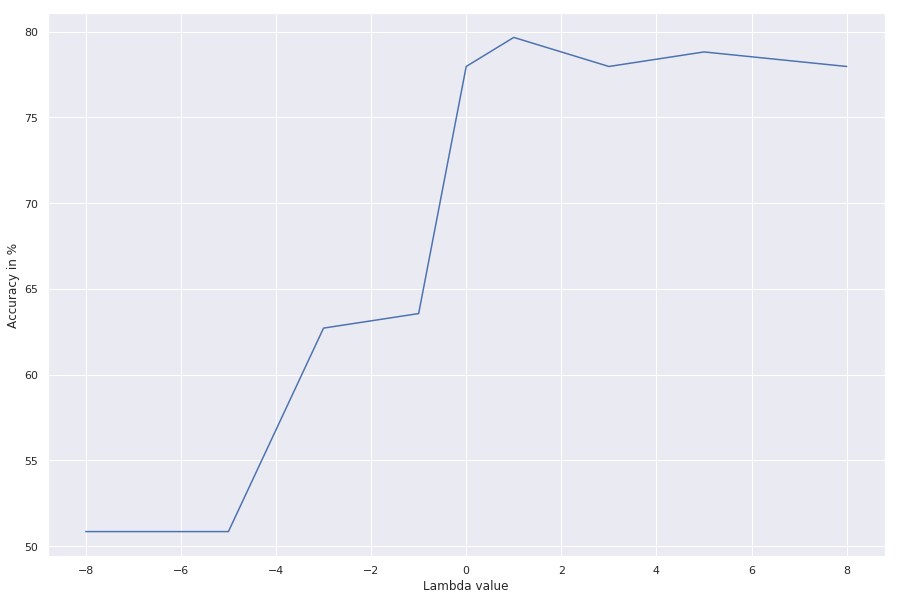

In [181]:
fig = plt.figure(figsize=(15,10))
lambs = [-8,-5,-3,-1,0,1,3,5,8]
def accuracy(lamb):
    temp = fmin_tnc(func=error, x0 = theta.flatten(), fprime=my_gradient, args=(X,Y.flatten(),lamb))
    theta_fitted = temp[0]
    prediction = convert_values(sigmoid(X@theta_fitted))
    wrong = np.sum(np.square(prediction-Y))
    return (len(Y)-wrong)/len(Y)*100
accuracies = []
for l in lambs:
    accuracies.append(accuracy(l))
plt.plot(lambs,accuracies)
plt.xlabel('Lambda value')
plt.ylabel('Accuracy in %')

 we  can see that the value lambda = 1 gives highest accuaracy of 80 percent out of all